<div style="display: block; width: 100%; text-align: center">
    <h2><font color="orange">Quantum</font> <font color="tomato"> Fourier Transform</font></h2>
</div>

<div style="display: block; width: 100%; text-align: center">
    <h3><font color="green">1. The Fourier Transform Algorithm</h3>
</div>

> We have the time domain CSV data of a 1s clip of C-maj chord played in a piano. Using Fourier Transform, we will try to figure out that the chord is made up of C, E and G. I wonder if math can teach machines music then how far is the day when it can teach machines emotions!

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import math as m
from scipy.fft import fft

In [81]:
sound_data = pd.read_csv("./assets/waveform.csv", header=None)
sound_data

,0,1
0,0.00000,-0.46933
1,0.00002,-0.46011
2,0.00005,-0.44931
3,0.00007,-0.41455
4,0.00009,-0.38632
...,...,...
44095,0.99989,0.10355
44096,0.99991,0.11536
44097,0.99993,0.12177
44098,0.99995,0.12454


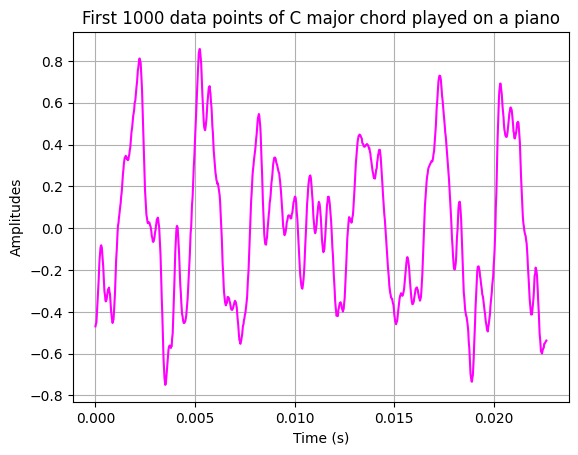

In [82]:
up = 1000
plt.title(f"First {up} data points of C major chord played on a piano")
plt.plot(sound_data[0][:up], sound_data[1][:up], c='magenta')
plt.grid()
plt.xlabel("Time (s)")
plt.ylabel("Amplitudes")
plt.show()

> ### The formula of Fourier Transform
> The formula for Discrete Fourier Transform is:\
> $$\displaystyle\phi_k = \frac{1}{\sqrt{N}}\sum_{j=0}^{N-1}{a_j e^{2\pi ijk/N}}$$
> Where,\
> $N$ is the number of total data points. Here we have $44100$ points in the 1s clip.\
> So, if there are $N$ data points then we have to calculate $\phi_0, \phi_1, \dots, \phi_{N-1}$. Here is an example workout to make things more clear.

> ### Demystifying the daunting Fourier Transform formula
> Consider a sequence of four points:\
> $\displaystyle a_0 = 0.841,$\
> $a_1 = 0.909,$\
> $a_2 = 0.141,$\
> $a_3 = -0.757$\
> We will calculate the corresponding $\phi_0, \phi_1, \phi_2, \text{and }\phi_3$.
>
> $$\displaystyle\phi_0=\frac{1}{\sqrt{4}}(0.841e^{2\pi i(0)(0)/4}+0.909e^{2\pi i(1)(0)/4}+0.141e^{2\pi i(2)(0)/4}-0.757e^{2\pi i(3)(0)/4}) = 0.567$$
> $$\displaystyle\phi_0=\frac{1}{\sqrt{4}}(0.841e^{2\pi i(0)(1)/4}+0.909e^{2\pi i(1)(1)/4}+0.141e^{2\pi i(2)(1)/4}-0.757e^{2\pi i(3)(1)/4}) = 0.35+0.833i$$
> $$\displaystyle\phi_0=\frac{1}{\sqrt{4}}(0.841e^{2\pi i(0)(2)/4}+0.909e^{2\pi i(1)(2)/4}+0.141e^{2\pi i(2)(2)/4}-0.757e^{2\pi i(3)(2)/4}) = 0.415$$
> $$\displaystyle\phi_0=\frac{1}{\sqrt{4}}(0.841e^{2\pi i(0)(3)/4}+0.909e^{2\pi i(1)(3)/4}+0.141e^{2\pi i(2)(3)/4}-0.757e^{2\pi i(3)(3)/4}) = 0.35−0.833i$$
>
> After finding those $\phi$ values, we need to take their norm as they can be complex numbers. So,\
> $$\displaystyle |\phi_0|=|0.567|=0.567$$\
> $$\displaystyle |\phi_1|=|0.35+0.833i|=\sqrt{(0.35)^2+(0.833)^2}=0.904$$\
> $$\displaystyle |\phi_2|=|0.415|=0.415$$\
> $$\displaystyle |\phi_3|=|0.35−0.833i|=\sqrt{(0.35)^2+(0.833)^2}=0.904$$
> 
> **Note,** one thing which may not be very clear from this workout is that, for $N$ data points, we are calculating $\phi_0, \dots, \phi_{N-1}$. These values show an important characteristics, that is: $\displaystyle \phi_k=\phi^*_{N-k}$. Only $\phi_0$ and $\phi_{(N/2)}$ are unique, all the other values are complex conjugates of each other. So, now if we plot $k$ and $\phi_k$, where $k\in[0, N/2]$ in the x and y axis respectively, we have our time domain data in the frequency domain.
>
> To make sure the results are correct, following is a function to calculate this thing and the result when passed with the same values as arguments.

In [95]:
def FourierTransform(data):
    N, i, freq = len(data), 0, {}
    tuples = list(data.itertuples())
    for i in range(N):
        phi = 0
        for j in range(N):
            phi += tuples[j][2]*(m.e**(complex(0, (2*m.pi*i*j)/N)))
        phi = round(abs(phi/m.sqrt(N)), 3)
        freq[i] = phi
    return freq

FourierTransform(pd.DataFrame([[0, 0.841], [1, 0.909], [2, 0.141], [3, -0.757]]))

{0: 0.567, 1: 0.904, 2: 0.415, 3: 0.904}

> ### The requirement of a faster algorithm - Fast Fourier Transform (FFT)
> So, we are now have our successfully running Fourier Transform function that can represent a time domain data into frequency domain. But there is a problem and that is, it is slow. The running time complexity of this naive implementation is $O(n^2)$. So, for $44k$ samples, it takes quite some time to calculate all the values. You can try running the function with the whole data. If not forever, it still takes some time around 3 to 5 mins to complete.
>
> Fast Fourier Transform (FFT) is the answer to the problem in classical domain. I think I will learn and implement it from scratch someday but it is not now. For now, I can use built-in function for FFT in the scipy package of python. My intention for now was to teach myself (or you who is not me but still following these notebooks) the fundamental concept of Fourier Transform. So, at this point, I will use the FFT function first to prove that result of that function and my function matches by running both algorithms on a thousand data points and then I will use it to finally figure out the notes from the C major chord.

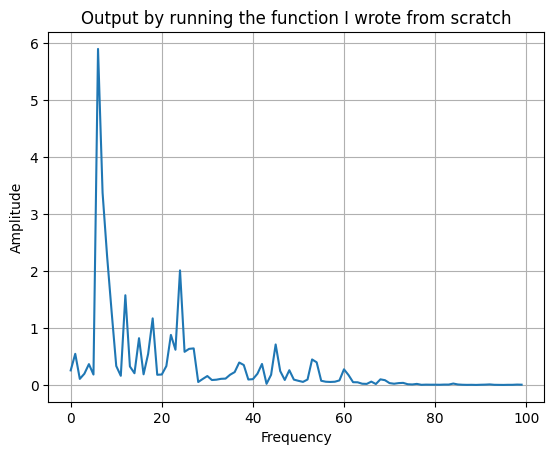

In [97]:
f = FourierTransform(sound_data[:1000])
plt.plot(list(f.keys())[:100], list(f.values())[:100])
plt.grid()
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.title("Output by running the function I wrote from scratch")
plt.show()

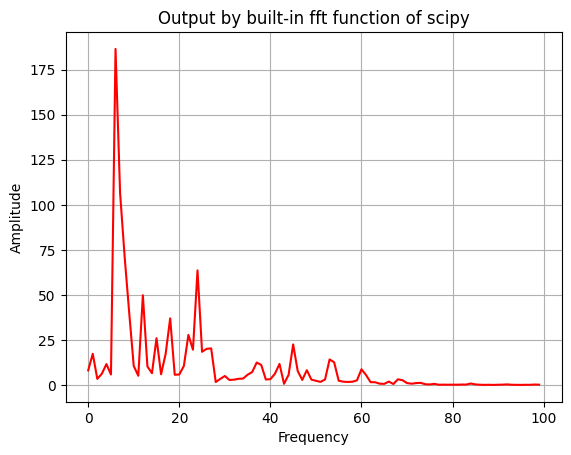

In [98]:
ff = fft(list(sound_data[:1000][1]))
plt.plot([i for i in range(100)], abs(ff[:100]), c='red')
plt.grid()
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.title("Output by built-in fft function of scipy")
plt.show()

> ### Finding C, E and G in C major chord
> This FFT is damn fast. It just did Fourier Transform on 44000 points in an instant. I am wondering how fast the quantum counterpart would be.

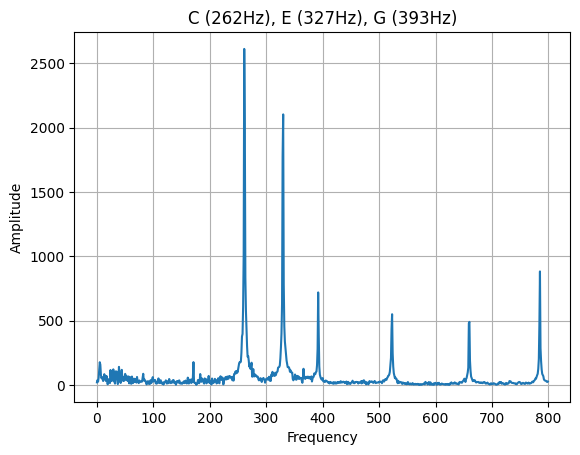

In [109]:
ft = abs(fft(list(sound_data[1])))
plt.plot([i for i in range(800)], ft[:800])
plt.grid()
plt.title("C (262Hz) + E (327Hz) + G (393Hz) = ")
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.show()